In [2]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\riahk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
features_scaled = scaler.fit_transform(df_market_data)

In [8]:

# Create DataFrame with scaled data
scaled_df = pd.DataFrame(features_scaled, index=df_market_data.index, columns=df_market_data.columns)

# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [10]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model to the data using df_market_data_scaled
    kmeans.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print or use inertia_values as needed
print(inertia_values)


C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

[287.0, 198.57181809798126, 123.19048183836959, 79.02243535120975, 66.35040961975504, 52.03884061602038, 43.92625599177811, 37.20934656760095, 32.67889912496265, 28.36293891070676, 24.579171813029077]


C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [11]:

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': list(range(1, 12)),
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Print or use elbow_df as needed
print(elbow_df)




    Number of Clusters (k)     Inertia
0                        1  287.000000
1                        2  198.571818
2                        3  123.190482
3                        4   79.022435
4                        5   66.350410
5                        6   52.038841
6                        7   43.926256
7                        8   37.209347
8                        9   32.678899
9                       10   28.362939
10                      11   24.579172


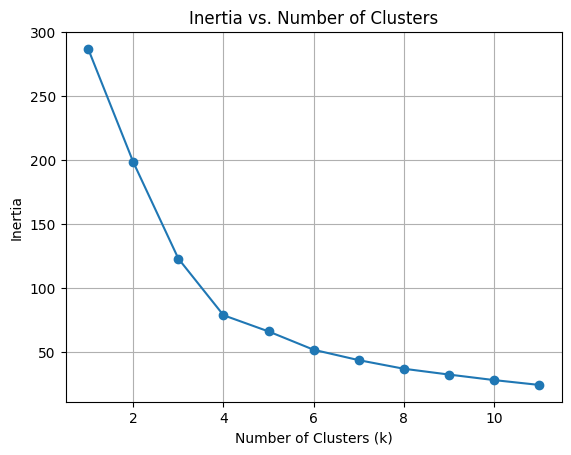

In [12]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Create a list of k-values
k_values = list(range(1, len(inertia_values) + 1))

# Plot a line chart
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
best_k = 4  

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k)

In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df) 
cluster_labels = kmeans.labels_

# Print or use the cluster labels as needed
print(cluster_labels)

C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Predict the clusters for the scaled data
predicted_clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values
print(predicted_clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [16]:
# Create a copy of the DataFrame
scaled_df = scaled_df.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df['predicted_cluster'] = predicted_clusters

# Display sample data
print(df_market_data.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",  # Color the points based on predicted clusters
    cmap="viridis",  # Choose a colormap
    hover_cols=["coin_id"],  # Add crypto name in the hover info
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    title="Crypto Price Change Scatter Plot"
)

# Show the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# Fit and transform the data to reduce to three principal components
# Fit and transform the data to reduce to three principal components
pca_components = pca.fit_transform(scaled_df)

# Convert the PCA components to a DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])
# View the first five rows of the DataFrame
pca_df.head()


,PC1,PC2,PC3
0,0.448908,-1.245376,-0.850640
1,0.495367,-0.899823,-1.317559
2,-0.818846,0.071899,0.695015
3,-0.840357,0.080054,0.544360
4,0.813240,-2.669520,-1.643321


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_
# Compute the total explained variance
total_explained_variance = sum(pca.explained_variance_ratio_)

# Print the total explained variance
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Total Explained Variance: 0.8886


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
A total explained variance of 0.8886 means that the three principal components explain 89% of the variance in the original data. This suggests that the three principal components are able to explain a large portion of the variability in the data, making them useful for dimensionality reduction or analysis.

In [22]:
# Creating a DataFrame with the PCA data
pca_data_df = pd.DataFrame(pca_components, index=df_market_data.index, columns=['PC1', 'PC2', 'PC3'])
# Display sample data
pca_data_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [24]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k)
    
    # Fit the model to the data using df_market_data_pca
    kmeans_pca.fit(pca_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)


C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


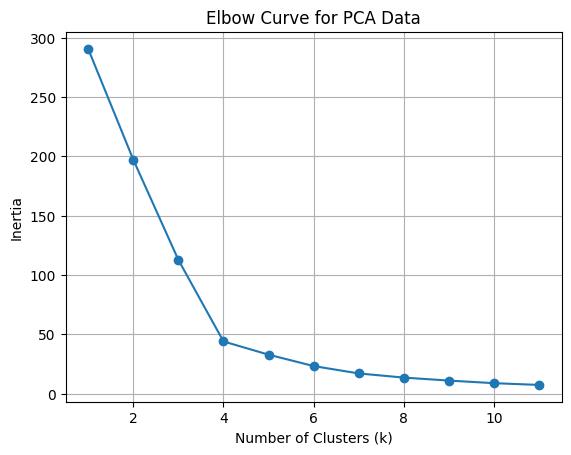

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca['Number of Clusters (k)'], elbow_df_pca['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for PCA Data')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  no the orignal data was also 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:

# Initialize the K-Means model using the best value for k
best_k = 4  

# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k)



In [28]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_data_df) 
pca_cluster_labels = kmeans.labels_

#print clusters
print(pca_cluster_labels)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 3 0 1 1 2
 1 1 1 1]


C:\Users\riahk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
# Predict the clusters for the PCA data
predicted_clusters_pca = kmeans_pca.predict(pca_data_df)

# Print the resulting array of cluster values
print(predicted_clusters_pca)


[ 3  3  8  8  6  3 10  3  3  0  4  8  8  6  0  3  4  0  3  8  4  3  8  8
  7  8  0  4  3  5  0  0  1  3  9  7  2  4  0  8  8]


In [30]:
# Create a copy of the DataFrame with the PCA data
pca_data_df_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_df_copy['predicted_cluster'] = predicted_clusters_pca

# Display sample data
pca_data_df_copy.head()


,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,3
ethereum,0.495367,-0.899823,-1.317559,3
tether,-0.818846,0.071899,0.695015,8
ripple,-0.840357,0.080054,0.544360,8
bitcoin-cash,0.813240,-2.669520,-1.643321,6


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_data_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",  
    cmap="viridis", 
    hover_cols=["coing_id"],  
    xlabel="Principal Component 1 (PC1)",
    ylabel="Principal Component 2 (PC2)",
    title="PCA Scatter Plot"
)

# Show the scatter plot
scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [32]:
# Composite plot to contrast the Elbow curves
elbow_curve_original = elbow_df.hvplot.line(
    x='Number of Clusters (k)',
    y='Inertia',
    label='Original Data',
    color='blue'
)

elbow_curve_pca = elbow_df_pca.hvplot.line(
    x='Number of Clusters (k)',
    y='Inertia',
    label='PCA Data',
    color='red'
)

# Combine the plots into a single composite plot
composite_plot = (elbow_curve_original * elbow_curve_pca).opts(
    title='Elbow Curves Comparison',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia'
)

# Display the composite plot
composite_plot

:Overlay
   .Curve.Original_Data :Curve   [Number of Clusters (k)]   (Inertia)
   .Curve.PCA_Data      :Curve   [Number of Clusters (k)]   (Inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The results of the two cluster analysis are about the same. The elbow curve for both sets of data follow about the same path. The best k valuse was 4 for both of the data sets.